In [ ]:
# Conectar-se ao Drive
from google.colab import drive

# https://docs.python.org/3/library/os.html
import os
import matplotlib.pyplot as plt

# skimage.io para carregar as imagens
# https://scikit-image.org/docs/dev/api/skimage.io.html
from skimage import io

# https://pandas.pydata.org/
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

from PIL import Image
import numpy as np

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Diretório do trabalho no drive

In [ ]:
os.chdir('/content/gdrive/My Drive/MAC5768 - Visão computacional/ep1/')

Metadados

In [ ]:
metadados = pd.read_csv('metadados/metadados.csv', encoding='utf-8', delimiter=",", index_col=0)

In [ ]:
metadados.head()

arquivo  classe       objecto  ...    local  resolucao    tamanho
0     20210417_153013.jpg  óculos  óculos gucci  ...  interno  2560x1440  1144814.0
1  20210417_153014(0).jpg  óculos  óculos gucci  ...  interno  2560x1440  1128321.0
2     20210417_153014.jpg  óculos  óculos gucci  ...  interno  2560x1440  1118719.0
3  20210417_153025(0).jpg  óculos   óculos dior  ...  interno  2560x1440  1084526.0
4     20210417_153025.jpg  óculos   óculos dior  ...  interno  2560x1440  1135350.0

[5 rows x 9 columns]

Função para usuário escolher a classe

In [ ]:
def let_user_pick(options):
    print("Qual classe você quer visualizar?")
    for idx, element in enumerate(options):
        print("{}) {}".format(idx+1,element))
    i = input("Coloque o número: ")
    try:
        if 0 < int(i) <= len(options):
            return int(i)
    except:
        pass
    return None
options = metadados.classe.unique()
class_id = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
class_dict = dict(zip(class_id, options))

In [ ]:
class_dict

{1: 'óculos',
 2: 'necessaire',
 3: 'colher',
 4: 'xícara',
 5: 'meia',
 6: 'mascara',
 7: 'caneta',
 8: 'book',
 9: 'charger',
 10: 'knife'}

Cria Mnist

In [ ]:
def plot_mnist(one_object=True):
  """
  Plota imagens do dataset em diagrama mnist-like

  params
    one_object: bool
      Se True, plota a primeira repetiçao, em todos os fundos, de todos os objetos de uma classe
      Se False, plota a primeira repetiçao, em todos os fundos, de todos os objetos de uma classes
  """
  if one_object:
    answer = let_user_pick(options)
    answer = class_dict[answer]

    metadados_filtro = metadados[(metadados.classe == answer) & (metadados.repeticao == 1)]

    # Ajuste para fundo das classes óculos, colher, necessaire, xícara
    metadados_filtro.loc[metadados_filtro.fundo == "tijolo", "fundo"] = "madeira"

  else:
    answer = 'padrao'
    metadados_filtro = metadados[metadados.repeticao == 1]
    
    # Ajuste para fundo já que diferem por classe
    metadados_filtro.loc[metadados_filtro.fundo.isin(["branco_1", "branco_2", "blue"]) , "fundo"] = "fundo_1"
    metadados_filtro.loc[metadados_filtro.fundo.isin(["magenta", "roxo", "pink"]) , "fundo"] = "fundo_2"
    metadados_filtro.loc[metadados_filtro.fundo.isin(["papelao", "madeira", "tijolo", "green"]) , "fundo"] = "fundo_3"

  list_env = [metadados_filtro.fundo.unique(), metadados_filtro.iluminacao.unique(), metadados_filtro.local.unique()]
  list_env_iter = tuple(itertools.product(*list_env))

  list_obj = metadados_filtro.objecto.unique()
  
  # traz uma imagem para input de dimensões
  if not one_object:
    image = Image.open('dados/20210509_104305.jpg')
    image = image.resize((100,150), Image.ANTIALIAS)
    image = np.array(image)
  elif answer in str(['óculos', 'necessaire', 'colher', 'xícara']):
    image = mpimg.imread('dados/20210417_153013.jpg')
  elif answer in str(['meia', 'mascara', 'caneta']):
    image = mpimg.imread('dados/PHOTO_20210502_110649.jpg')
  else:
    image = mpimg.imread('dados/20210509_104305.jpg')

  num_row = len(list_obj)
  num_col = len(list_env_iter)
  height = image.shape[0]/1000
  width = image.shape[1]/1030

  # plot images
  if one_object:
    fig, axes = plt.subplots(num_row, num_col, figsize=(num_col*width, num_row*height))
  else:
    fig, axes = plt.subplots(num_row, num_col, figsize=(num_col+10, num_row+50))
  
  for i, obj in enumerate(list_obj):
      for j, (fundo, ilum, local) in enumerate(list_env_iter):

          df_aux = metadados_filtro[
              (metadados_filtro['objecto'].eq(obj)) &
              (metadados_filtro['fundo'].eq(fundo)) &
              (metadados_filtro['iluminacao'].eq(ilum)) &
              (metadados_filtro['local'].eq(local))
          ]
          arquivo = df_aux['arquivo'].values
          if one_object:
            image = mpimg.imread('dados/' + arquivo[0])
          else:
            image = Image.open('dados/' + arquivo[0])
            image = image.resize((100,150), Image.ANTIALIAS)
            image = np.array(image)
          
          ax = axes[i, j]
          ax.imshow(image, aspect='equal')
          ax.set_axis_off()    
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.show()

Para rodar o mnist:\
plot_mnist(True) - mostra a classe escolhida\
plot_mnist(False) - mostra todas as classes

Qual classe você quer visualizar?
1) óculos
2) necessaire
3) colher
4) xícara
5) meia
6) mascara
7) caneta
8) book
9) charger
10) knife
Coloque o número: 8


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


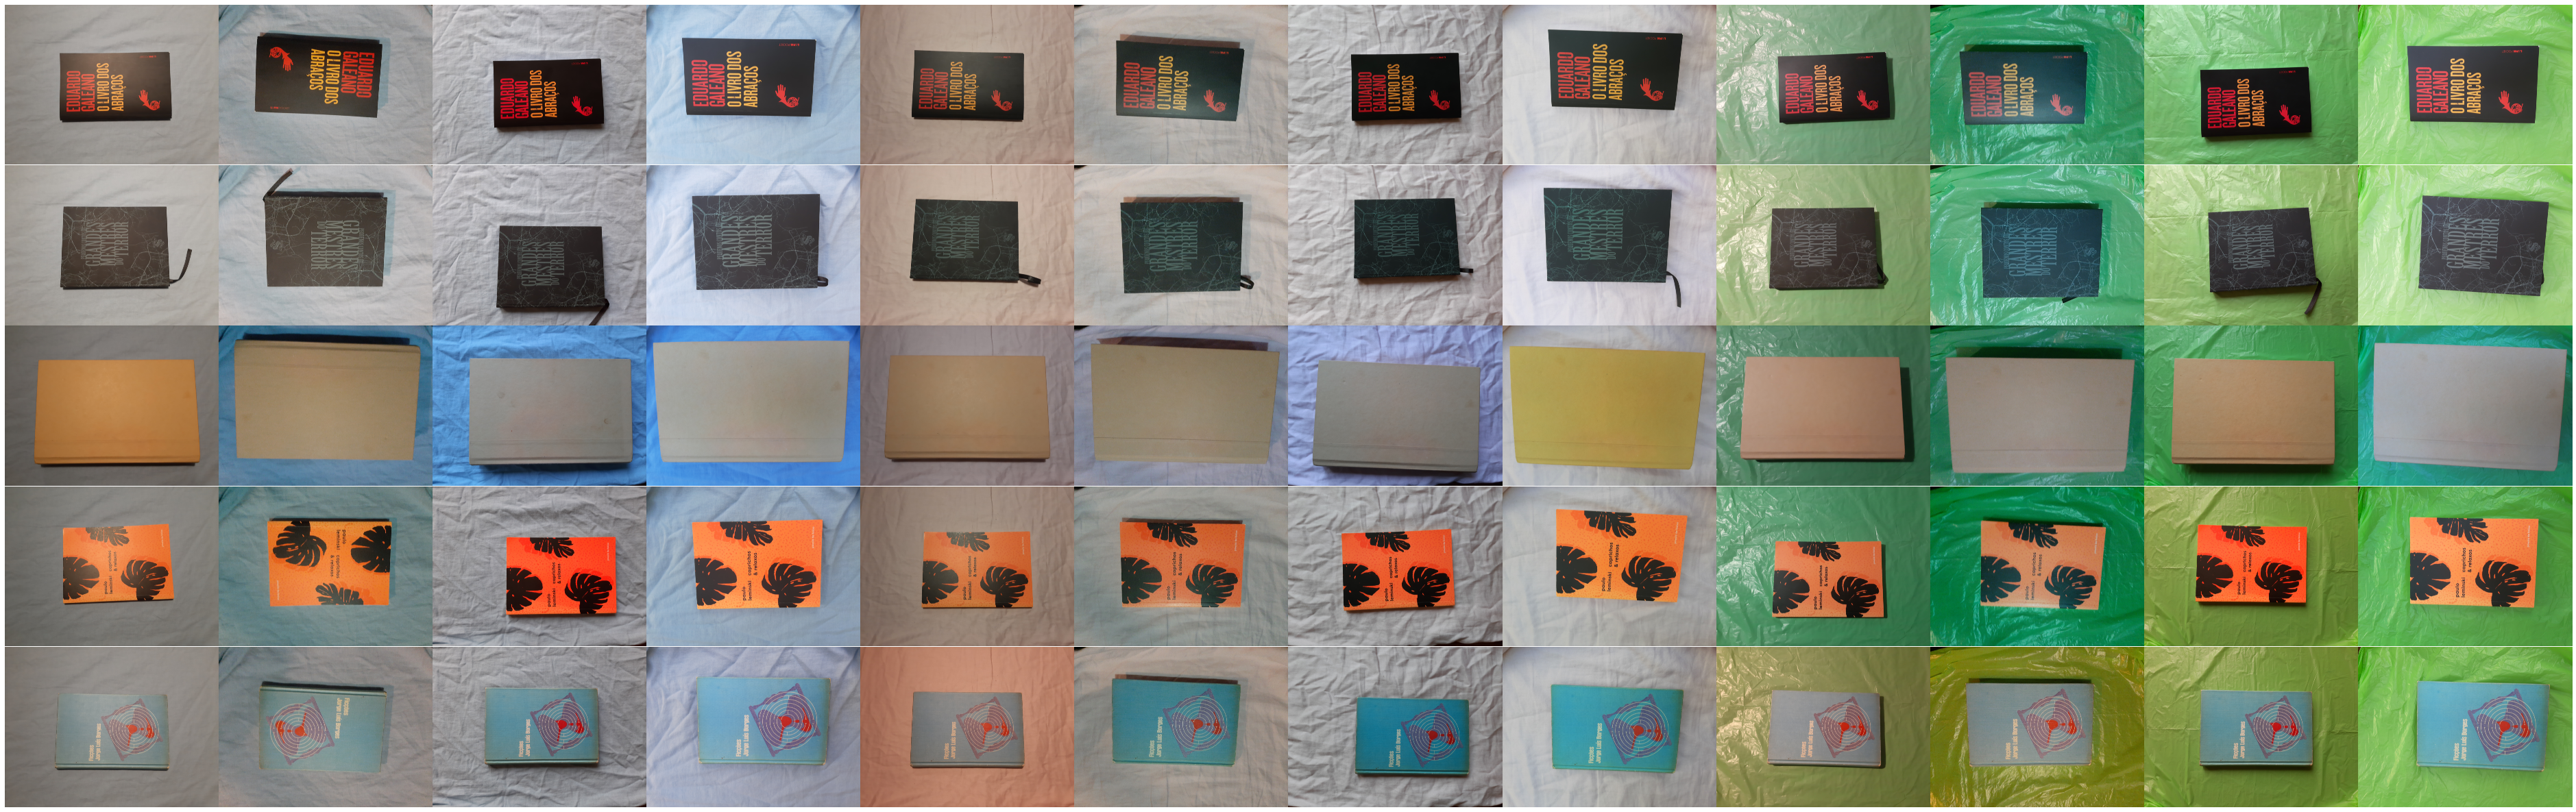

In [ ]:
plot_mnist(True)

## Tabela Sumária

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

num_class = metadados.classe.nunique()
num_img = metadados.arquivo.nunique()
total_size = metadados['tamanho'].sum()
# As resoluções das fotos estão diferentes, portanto deixamos a média
resolucao_aux_1 = metadados['resolucao'].str.slice(0, 4).astype('int')
resolucao_aux_2 = metadados['resolucao'].str.slice(5, 9).astype('int')
resolucao_str = str(int(resolucao_aux_1.mean())) + 'x' + str(int(resolucao_aux_2.mean()))

summary_global_dict = {'Descrição': ['Número de classes',
                                     'Número de imagens',
                                     'Tamanho da base (bytes)',
                                     'Tamanho da base (Gb)',
                                     'Resolução das imagens (média)'],
                      
                      'Valor': ['{:.0f}'.format(num_class),
                                '{:.0f}'.format(num_img),
                                total_size,
                                '{:.1f}'.format(total_size / 1024 / 1024 / 1024),
                                resolucao_str]}

pd.DataFrame(summary_global_dict)

Descrição         Valor
0              Número de classes            10
1              Número de imagens          1584
2        Tamanho da base (bytes) 4557177029.00
3           Tamanho da base (Gb)           4.2
4  Resolução das imagens (média)     3655x2432

## Tabela detalhada por classe

In [ ]:
name_class = pd.DataFrame(metadados.groupby('classe').objecto.nunique())
var_background = pd.DataFrame(metadados.groupby('classe').fundo.nunique())
var_light = pd.DataFrame(metadados.groupby('classe').iluminacao.nunique())
var_place = pd.DataFrame(metadados.groupby('classe').local.nunique())
num_rept = pd.DataFrame(metadados.groupby('classe').repeticao.nunique())
total_img = pd.DataFrame(metadados.groupby('classe').arquivo.nunique())

summary_class = (name_class
                 .merge(var_background,on='classe')
                 .merge(var_light,on='classe')
                 .merge(var_place,on='classe')
                 .merge(num_rept,on='classe')
                 .merge(total_img,on='classe'))

summary_class['iluminacao'] = summary_class['iluminacao'] * summary_class['local']
summary_class = summary_class.drop(['local'], axis = 1)
summary_class.reset_index(inplace = True)
summary_class.rename(columns={"arquivo": "qtd_arquivos"})

classe  objecto  fundo  iluminacao  repeticao  qtd_arquivos
0        book        5      3           4          3           180
1      caneta        3      3           4          3           108
2     charger        5      3           4          3           180
3      colher        5      4           4          3           180
4       knife        5      3           4          3           180
5     mascara        3      3           4          3           108
6        meia        3      3           4          3           108
7  necessaire        4      4           4          3           144
8      xícara        6      4           4          3           216
9      óculos        5      4           4          3           180